In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import hdf5storage as h5
import stemtool as st
%matplotlib inline
plt.rcParams['image.cmap'] = 'magma'
plt.rcParams.update({'font.size': 25})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'figure.autolayout': True})

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from matplotlib.colors import LinearSegmentedColormap as LSC
lin_burd = LSC.from_list('list', [(0, 35/255, 156/255), (0.95,0.95, 0.95),(249/255,56/255,34/255)], N=256)

In [5]:
st.tic()
datRhPt = h5.loadmat('/home/qz7/Data/Core@Shell NBED/Nion Swift Library 20190810 - EH-83-I Rh@Pt Thick/RhPtThick.mat')
st.toc()

Elapsed time: 21.586926 seconds.



In [6]:
st.tic()
json1 = '/home/qz7/Data/Core@Shell NBED/Nion Swift Library 20190810 - EH-83-I Rh@Pt Thick/Strain GPA/Particle1_ACSTEM_00.json'
json2 = '/home/qz7/Data/Core@Shell NBED/Nion Swift Library 20190810 - EH-83-I Rh@Pt Thick/Strain GPA/Particle2_ACSTEM_00.json'
with open(json1) as json_1:
    info_1 = json.load(json_1)
with open(json2) as json_2:
    info_2 = json.load(json_2)
st.toc()

Elapsed time: 0.001030 seconds.



In [7]:
calib1 = info_1['spatial_calibrations'][0]['scale']
calib1_units = info_1['spatial_calibrations'][0]['units']

In [8]:
imageDC = np.rot90(datRhPt['particle1_im'])

To ensure only the nanoparticle is picked, we will do a digital selected area electron diffraction - we will pick two diffraction spots and then mask the image so that we will analyze only the image where the diffraction spots came from.

In [9]:
gpa = st.gpa.GPA(imageDC, calib1, calib1_units)

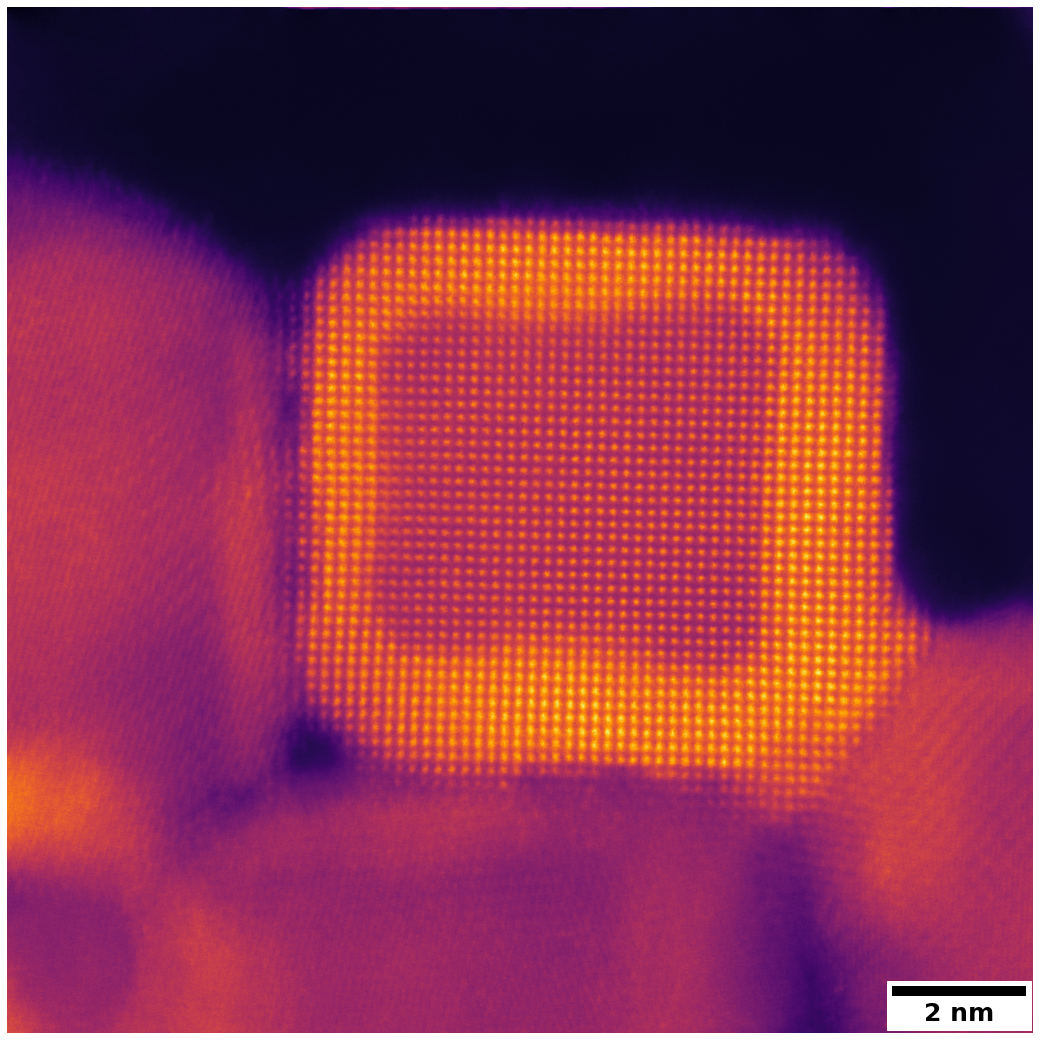

In [10]:
gpa.show_image()

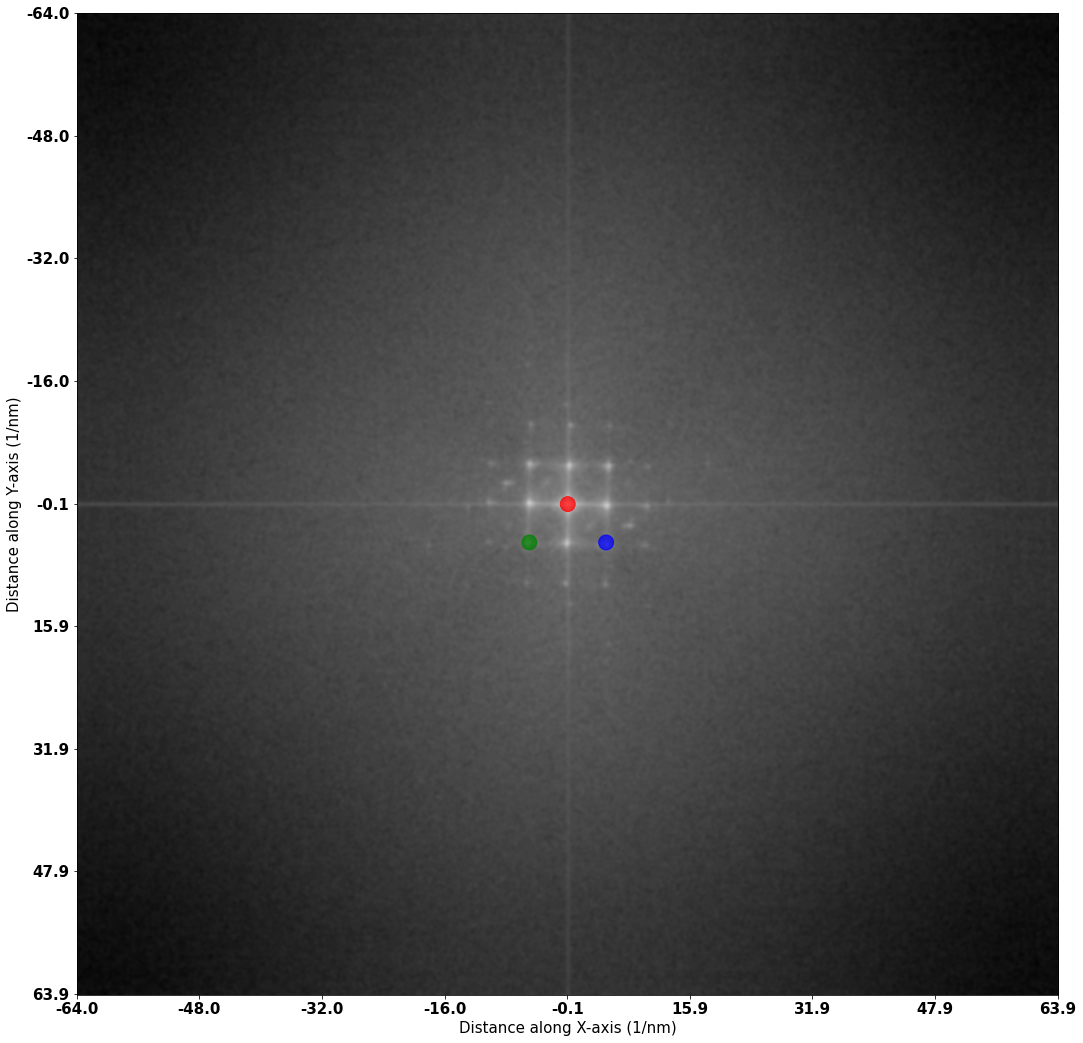

In [25]:
gpa.find_spots((5, 5), (-5, 5), imsize=(15, 15))

Choose your points in a clockwise fashion, or else you will get a wrong result


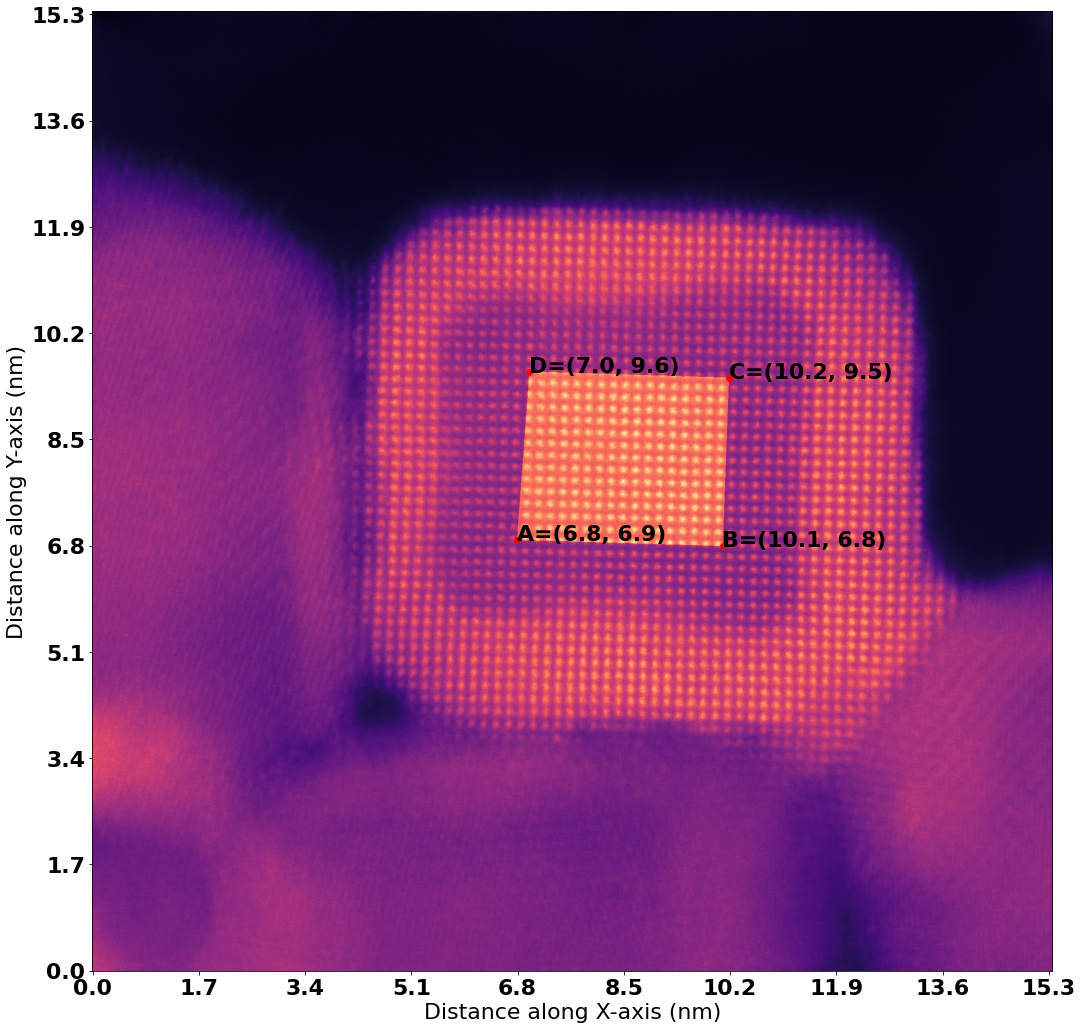

In [26]:
gpa.define_reference((6.8, 6.9), (10.1, 6.8), (10.2, 9.5), (7.0, 9.6), (15, 15))

In [27]:
st.tic()
gpa.refine_phase()
e_xx,e_yy,e_theta,e_diag = gpa.get_strain()
st.toc()

Elapsed time: 68.752578 seconds.



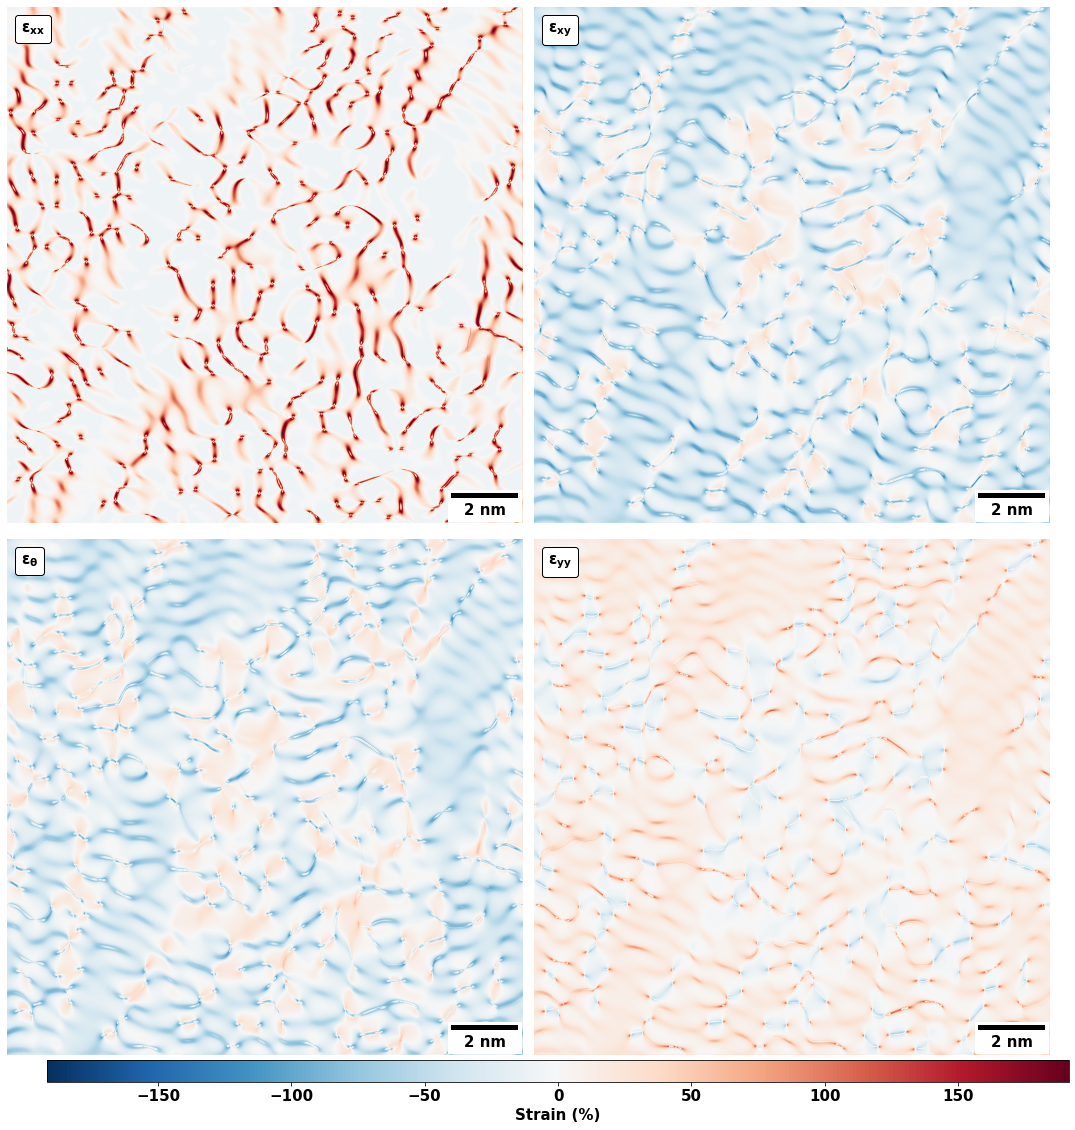

In [28]:
gpa.plot_gpa_strain(imsize= (15, 15))